In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from numpy.f2py.crackfortran import lenarraypattern

In [83]:
training_set = pd.read_csv('SalaryData.csv')

x_train = training_set['YearsExperience'].values
y_train = training_set['Salary'].values
# Reshape for sklearn
X = x_train.reshape(-1, 1)
y = y_train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


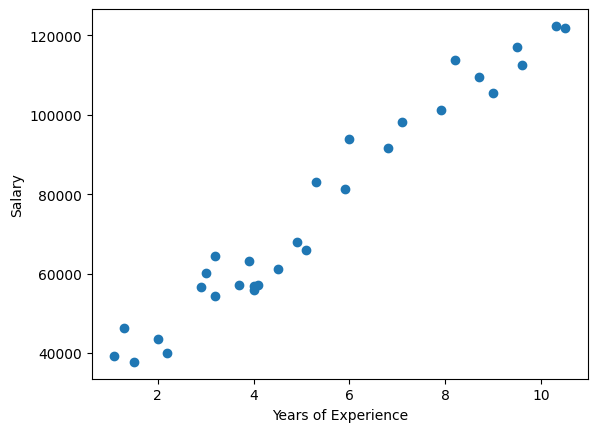

In [84]:
plt.scatter(x_train, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [85]:
def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0
    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) **2
        cost_sum += cost

    total_cost = cost_sum/(2*m)
    return total_cost

In [86]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db =0
    for i in range(m):
        f = w * x[i] + b
        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db
    return dc_dw, dc_db

In [87]:
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0
    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)
        w = w - alpha * dc_dw
        b = b - alpha * dc_db
        print(f"iteration: {i}, w: {w}, b: {b}: Cost {cost_function(x, y, w, b)}" )

    return w, b

In [88]:
learning_rate = 0.01
iterations = 10000
final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")


iteration: 0, w: 4773.987, b: 760.03: Cost 1344612525.8413548
iteration: 1, w: 7788.160088166667, b: 1258.8018573999998: Cost 582933639.1249903
iteration: 2, w: 9690.227091055453, b: 1592.4329328080776: Cost 278595825.9816312
iteration: 3, w: 10889.506030597111, b: 1821.6645373752503: Cost 156901936.81054005
iteration: 4, w: 11644.664832824514, b: 1984.882138242438: Cost 108149191.53202362
iteration: 5, w: 12119.168311256937, b: 2106.3434587426045: Cost 88526795.5063979
iteration: 6, w: 12416.317808711374, b: 2201.3782145503933: Cost 80538511.12387824
iteration: 7, w: 12601.394448807383, b: 2279.674079502025: Cost 77197055.8093798
iteration: 8, w: 12715.65253207105, b: 2347.353246993706: Cost 75711992.7100282
iteration: 9, w: 12785.16264257986, b: 2408.284709986394: Cost 74968933.0700283
iteration: 10, w: 12826.400036553403, b: 2464.9135544774535: Cost 74522833.02695376
iteration: 11, w: 12849.77621652685, b: 2518.7850303238083: Cost 74195957.63300419
iteration: 12, w: 12861.8707045965

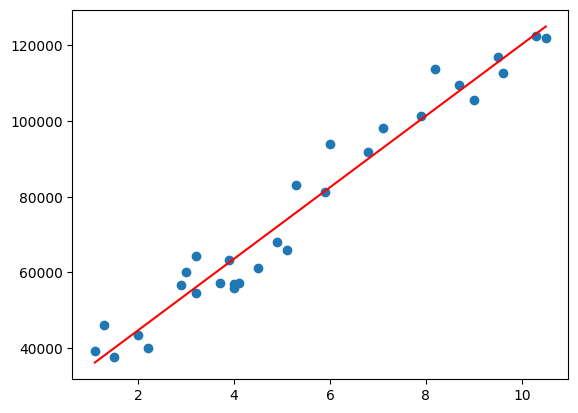

In [89]:
plt.scatter(x_train, y_train, label='Data Points')
x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Linear Regression')

In [90]:
y_pred_custom = final_w * x_train + final_b

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_sklearn_full = model.predict(X)


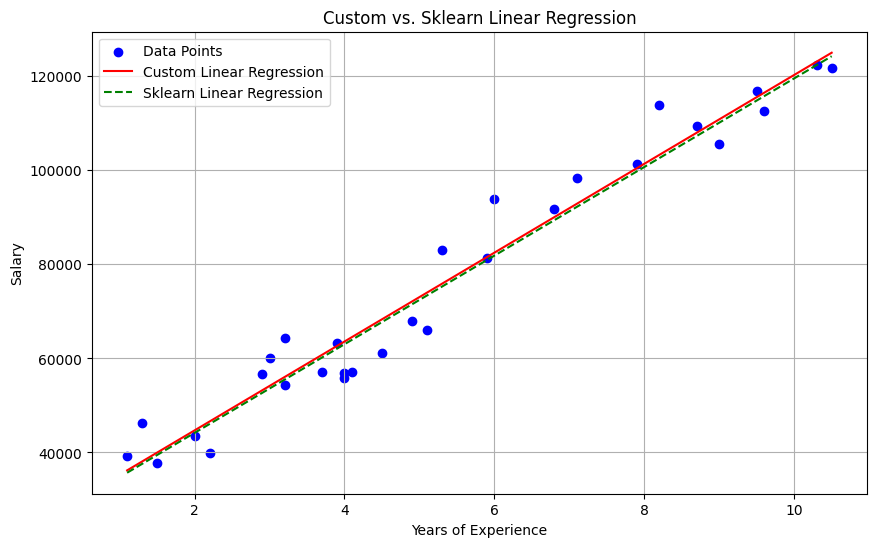

In [91]:
# --- Plotting ---
plt.figure(figsize=(10, 6))

# Original Data
plt.scatter(x_train, y_train, color="blue", label="Data Points")

# Custom Regression Line
# Plots the line (x_train vs y_pred_custom)
plt.plot(x_train, y_pred_custom, color="red", label="Custom Linear Regression")

# Sklearn Regression Line
# Plots the line (x_train vs y_pred_sklearn_full)
plt.plot(x_train, y_pred_sklearn_full, color="green", linestyle="--", label="Sklearn Linear Regression")

plt.title("Custom vs. Sklearn Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()